In [1]:
import pickle
import matplotlib.pyplot as plt
import math

In [3]:
prothash = pickle.load( open("prothashtable_k3.p", "rb") )

In [4]:
print(prothash['MNWQK'])

KeyError: 'MNWQK'

In [5]:
# Create a histgram of the distrobution of number of associated secondary structures
countvec = []
for key, value in prothash.items():
    countvec.append(len(value))
    #print(len(value))
    #print(key, value)

Text(0, 0.5, 'Frequency')

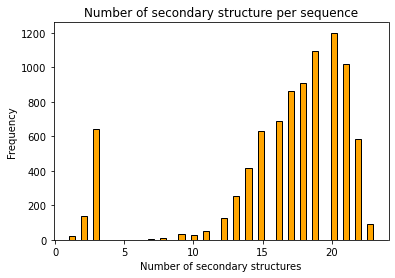

In [6]:
plt.hist(countvec, bins=50, color="orange", edgecolor="black")
plt.title("Number of secondary structure per sequence")
plt.xlabel("Number of secondary structures")
plt.ylabel("Frequency")

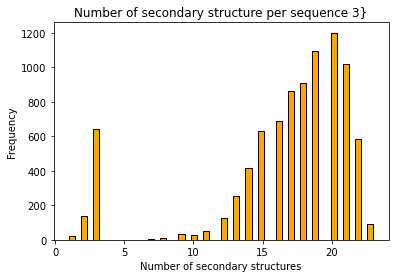

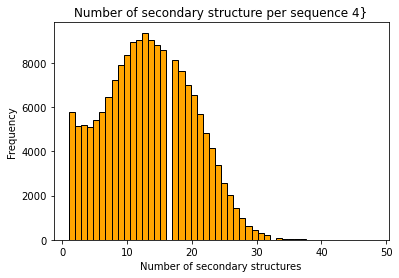

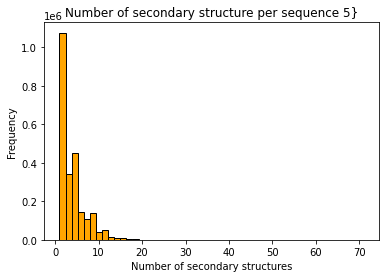

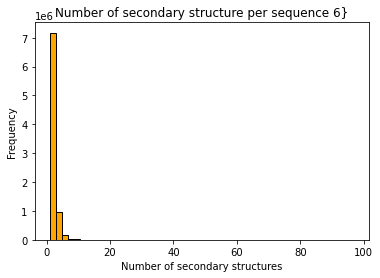

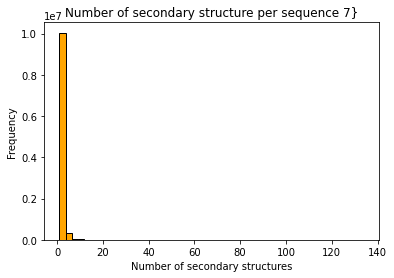

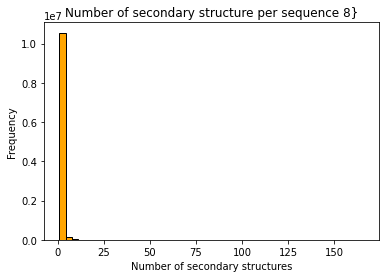

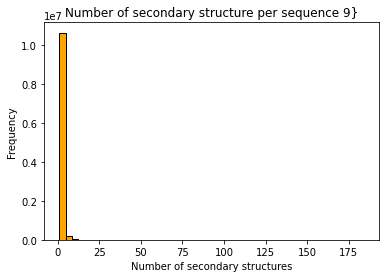

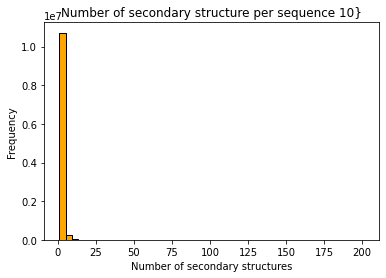

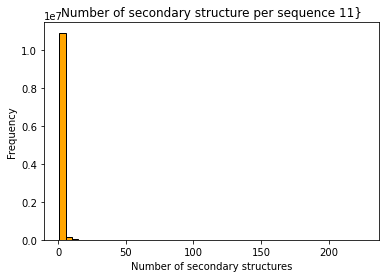

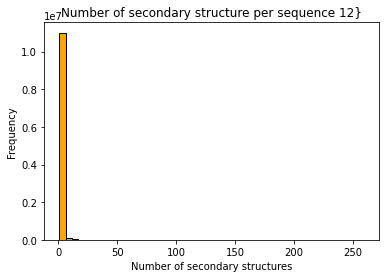

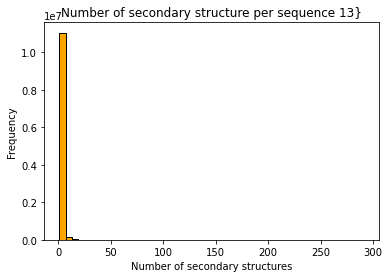

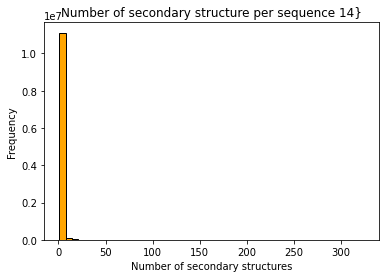

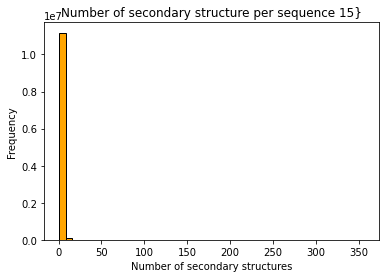

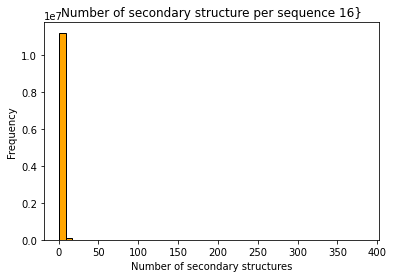

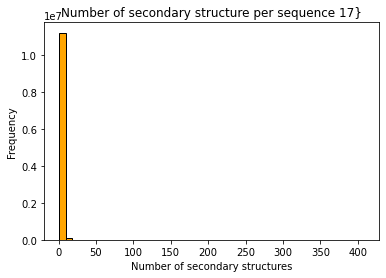

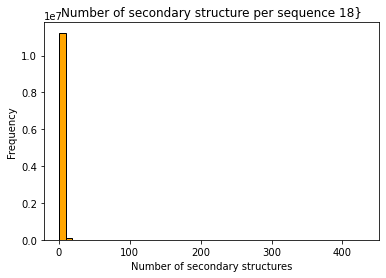

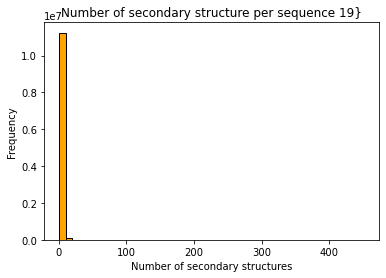

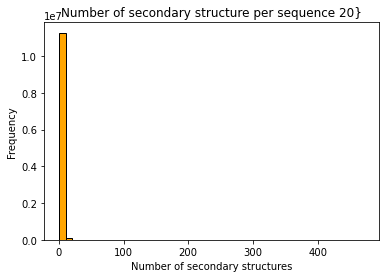

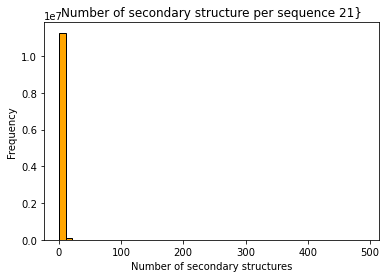

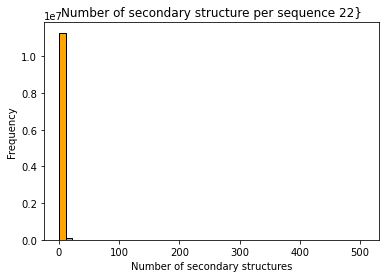

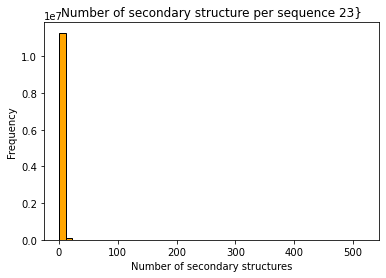

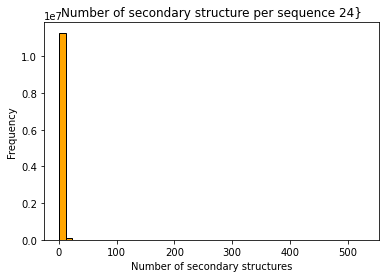

In [ ]:
for k in range(3,31):
    prothash = pickle.load( open(f"prothashtable_{k}.p", "rb") )
    # Create a histgram of the distrobution of number of associated secondary structures
    countvec = []
    for key, value in prothash.items():
        countvec.append(len(value))
    # plot
    plt.hist(countvec, bins=50, color="orange", edgecolor="black")
    plt.title(f"Number of secondary structure per sequence {k}}}")
    plt.xlabel("Number of secondary structures")
    plt.ylabel("Frequency")
    plt.show()

In [57]:
"""
# turn hash table into probabilities
def turntoprobs(hash_table):
   # 
   # turns values from counts to probs
   # 
    new_hash_table = {}
    for key, value in hash_table.items():
        
        
    return new_hash_table
"""

# get kmers 
def get_kmers(primary_prot_seq, kmer_length):
    """
    returns an array of the input string as chunks length k
    """
    kmer_array = [primary_prot_seq[i:i+kmer_length] 
                  for i in range(len(primary_prot_seq)-(kmer_length-1))]  
    return kmer_array

# Algorithm
def debruijnextend_v1(primary_seq, k):
    """
    This method takes in a primary protein sequence annd returns the
    secondary structure predicted with the highest probability.
    INPUT: primary protein sequence (type: string), 
           pickled hash table (type: python dict),
           kmer length (type: int)
    OUTPUT: 3-based secondary structure (using CEH, type: string) 
    """
    primary_karray = get_kmers(primary_seq, k)
    hash_table = pickle.load(open(f"prothashtable_{k}.p", "rb"))
    
    
    ###
    # STEP 1: Find corresponding secondary structures
    ###
    potential_secondaries = {} # this will have all layers for our graph
    for kmer in primary_karray:
        diff = k - 1 # this is the overlap to check
        
        # turn into probalities 
        temp_dict = {}
        summ = 0
        for key, value in hash_table[kmer].items():
            summ += value
            temp_dict[key] = value
        for key, value in temp_dict.items():
            temp_dict[key] = (-1) * math.log(round(value / summ, 5))
            
        # add potential secondarys structure to new dictionary
        potential_secondaries[kmer] = temp_dict
        
    ###
    # STEP 2: Connect the layers, use dynamic programming per layer
    ###
    stitchextend_dict = potential_secondaries[primary_karray[0]].copy() #initialize with first
    for kmer_i in range(1,len(primary_karray)): # looping through the layers
        for seq, prob in stitchextend_dict.items(): # loop through extended sequences
            kmer_lay = primary_karray[kmer_i]
            for kmer_in_layer, kmer_prob in potential_secondaries[kmer_lay].items(): # loop through kmers per layer
                end_of_ext = seq[-(k-1):] # last k-1
                start_of_kmer = kmer_in_layer[:k-1] # up to k-1
                if end_of_ext == start_of_kmer:
                    # if equal, THEN STITCH AND EXTEND
                    extended_seq = seq + kmer_in_layer[-1]
                    extended_prob = prob + kmer_prob
                    del stitchextend_dict[seq] # delete old
                    stitchextend_dict[extended_seq] = extended_prob # add new
    
    ####
    # STEP 3: choose the top 10
    ####
    return stitchextend_dict
                    
print(debruijnextend_v1('RRWFWR', 5))

{'CCCCCCCCCC': 5.49311144359055}


In [15]:
get_kmers('RRWFWR',3)

['ATA', 'TAC', 'ACT', 'CTA', 'TAT', 'ATA', 'TAC']

In [46]:
k = 5
seq = "ATACTATAC"
end_of_ext = seq[:k-1]
print(end_of_ext)

ATAC


In [19]:
# get kmers 
def get_kmers(primary_prot_seq, kmer_length):
    """
    returns an array of the input string as chunks length k
    """
    kmer_array = [primary_prot_seq[i:i+kmer_length] 
                  for i in range(len(primary_prot_seq)-(kmer_length-1))]  
    
    return kmer_array

# Algorithm
def debruijnextend_v1(primary_seq, k):
    """
    This method takes in a primary protein sequence annd returns the
    secondary structure predicted with the highest probability.
    INPUT: primary protein sequence (type: string), 
           pickled hash table (type: python dict),
           kmer length (type: int)
    OUTPUT: 3-based secondary structure (using CEH, type: string) 
    """
    primary_karray = get_kmers(primary_seq, k)
    hash_table = pickle.load(open(f"prothashtable_{k}.p", "rb"))
    
    
    ###
    # STEP 1: Find corresponding secondary structures
    ###
    potential_secondaries = {} # this will have all layers for our graph
    for kmer in primary_karray:
        # turn into probalities 
        temp_dict = {}
        summ = 0
        for key, value in hash_table[kmer].items():
            summ += value
            temp_dict[key] = value
        for key, value in temp_dict.items():
            temp_dict[key] = (-1) * math.log(round(value / summ, 5))
            
        # add potential secondarys structure to new dictionary
        potential_secondaries[kmer] = temp_dict
        
    ###
    # STEP 2: Connect the layers, use dynamic programming per layer
    ###
    stitchextend_dict = potential_secondaries[primary_karray[0]].copy() #initialize with first
    for kmer_i in range(1,len(primary_karray)): # looping through the layers
        kmer_lay = primary_karray[kmer_i]
        seq_ext = {}
        stitchextend_dict_iplus = {}
        for kmer_in_layer, kmer_prob in potential_secondaries[kmer_lay].items(): # loop through kmers per layer
            for seq, prob in stitchextend_dict.items(): # loop through extended sequences
                end_of_ext = seq[-(k-1):] # last k-1
                start_of_kmer = kmer_in_layer[:k-1] # up to k-1
                if end_of_ext == start_of_kmer:
                    
                    # if equal, THEN STITCH AND EXTEND
                    extended_seq = seq + kmer_in_layer[-1]
                    extended_prob = prob + kmer_prob
                    stitchextend_dict_iplus[extended_seq] = extended_prob # add new seq and prob
                    seq_ext[seq] = 0 # delete on next layer
            
        for sequence_extended in seq_ext.keys():
            del stitchextend_dict[sequence_extended] # delete the old
        stitchextend_dict.update(stitchextend_dict_iplus) # add the new
        
    ####
    # STEP 3: choose the top 10
    ####
    top_number = 10
    out_array = sorted(stitchextend_dict.items(), key=lambda item: item[1])[:top_number]
    
    return out_array

# 5,'5DSC','GKGSG','CCTTC','CCCCC','N'
# 6,'2OMP','LYQLEN','CEEEEC','CEEEEC','B'

debruijnextend_v1('ASKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTT', 5)

[('CCCHHHEE', 11.079509233683813),
 ('CCCEECE', 15.472757316218196),
 ('CCCHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC',
  20.970471147214898),
 ('CCHHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC',
  21.97608670588113),
 ('CCCCHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC',
  22.728677035203628),
 ('CCCHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEEHHHCEEEEEEEECCCCCCCCHHHHCCC',
  23.182648546728323),
 ('CCCHHHHCCHHHHCCC', 23.562152057363814),
 ('CCCHHHHHCCEEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC',
  23.864260304074712),
 ('CCHHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEEHHHCEEEEEEEECCCCCCCCHHHHCCC',
  24.188264105394556),
 ('CCHHHHHCCHHHHCCC', 24.567767616030046)]

In [7]:
one = 'CCCHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC'
two = 'CCHHHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC'
three 'CCCCHHHHCCCEEEEEEEEEEECCEEEEEEEEEEEECCCCEEEEEEEECCCCCCCCHHHHCCC'

if one == two:
    print("the same")
else:

SyntaxError: invalid syntax (<ipython-input-7-bc4cad7eff4e>, line 3)

In [15]:
class DebruijnExtend():
    """
    This class impliments a debruijn extend 
    """
    
    # CONSTRUCTOR
    def __init__(self):
        """
        """
        self.sequence = ""

    # get kmers 
    def get_kmers(self, primary_prot_seq, kmer_length):
        """
        returns an array of the input string as chunks length k
        """
        kmer_array = [primary_prot_seq[i:i+kmer_length] 
                      for i in range(len(primary_prot_seq)-(kmer_length-1))]  

        return kmer_array

    def find_secondary_structs(self, primary_karray, hash_table):
        """
        This method returns only the relevant hashes from the larger hash table.
        """
        potential_secondaries = {} # this will have all layers for our graph
        for kmer in primary_karray:
            # turn into probalities 
            temp_dict = {}
            summ = 0
            for key, value in hash_table[kmer].items():
                summ += value
                temp_dict[key] = value
            for key, value in temp_dict.items():
                temp_dict[key] = (-1) * math.log(round(value / summ, 5))    
            # add potential secondarys structure to new dictionary
            potential_secondaries[kmer] = temp_dict

        return potential_secondaries

    def stitchextend(self, primary_karray, potential_secondaries, k):
        """
        CORE ALGORITHM.

        This method is the core of the debruijnextend algorithm. It impliments a dynamic programming
        approach to traverse through each layer of the debruijn graph, then uses edge contraction
        to create the new input to the next iteration.
        """
        stitchextend_dict = potential_secondaries[primary_karray[0]].copy() #initialize with first
        for kmer_i in range(1,len(primary_karray)): # looping through the layers
            kmer_lay = primary_karray[kmer_i]
            seq_ext = {}
            stitchextend_dict_iplus = {}
            for kmer_in_layer, kmer_prob in potential_secondaries[kmer_lay].items(): # loop through kmers per layer
                for seq, prob in stitchextend_dict.items(): # loop through extended sequences
                    end_of_ext = seq[-(k-1):] # last k-1
                    start_of_kmer = kmer_in_layer[:k-1] # up to k-1
                    seq_ext[seq] = 0 # delete on next layer #TODO: store in final if not extended.
                    if end_of_ext == start_of_kmer:

                        # if equal, THEN STITCH AND EXTEND
                        extended_seq = seq + kmer_in_layer[-1]
                        extended_prob = prob + kmer_prob
                        stitchextend_dict_iplus[extended_seq] = extended_prob # add new seq and prob

            for sequence_extended in seq_ext.keys():
                del stitchextend_dict[sequence_extended] # delete the old
            stitchextend_dict.update(stitchextend_dict_iplus) # add the new

        return stitchextend_dict

    # Algorithm
    def debruijnextend_v1(self, primary_seq, k):
        """
        This method takes in a primary protein sequence annd returns the
        secondary structure predicted with the highest probability.
        INPUT: primary protein sequence (type: string), 
               pickled hash table (type: python dict),
               kmer length (type: int)
        OUTPUT: 3-based secondary structure (using CEH, type: string) 
        """
        primary_karray = self.get_kmers(primary_seq, k)
        hash_table = pickle.load(open(f"prothashtable_{k}.p", "rb"))

        ###
        # STEP 1: Find corresponding secondary structures
        ###
        potential_secondaries = self.find_secondary_structs(primary_karray, hash_table)

        ###
        # STEP 2: Connect the layers, use dynamic programming per layer (i.e. StitchExtend)
        ###
        stitchextend_dict = self.stitchextend(primary_karray, potential_secondaries, k)

        ####
        # STEP 3: choose the top 10
        ####
        top_number = 50
        out_array = sorted(stitchextend_dict.items(), key=lambda item: item[1])[:top_number]

        return out_array

# 5,'5DSC','GKGSG','CCTTC','CCCCC','N'
# 6,'2OMP','LYQLEN','CEEEEC','CEEEEC','B'

new_obj = DebruijnExtend()
input_seq = 'GKGSG'
for k in range(3,min(len(input_seq),31)):
    secondary = new_obj.debruijnextend_v1(input_seq, k)[0]
    print(f"k={k}: {secondary}")

k=3: ('CCCCC', 1.4085828724602902)
k=4: ('CCCCC', 1.3028010057847008)
